# OCR 모델 crop 이미지 적용하기

## 라이브러리

In [4]:
import pandas as pd
import numpy as np
import os
import json
import pprint

import cv2
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import paddle
import paddleocr
from paddleocr import PaddleOCR, draw_ocr
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [9]:
ocr_model = PaddleOCR(lang = 'korean')

img_path = '2ali6i.jpg'

# 이미지 로드
image = cv2.imread(img_path)

# 이미지 자르기
x1, y1 = 0, 0  # 좌측 상단 모서리의 좌표
x2, y2 = 500, 500  # 우측 하단 모서리의 좌표
cropped_image = image[y1:y2, x1:x2]

# 크롭된 이미지 변수, cropped_image를 아래와 같이 활용
result = ocr_model.ocr(cropped_image, cls = False)

# 결과 출력
# cv2.imshow('Original Image', image)
# cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(5)

[2024/09/02 02:31:29] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\UserK/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\UserK/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model

-1

In [10]:
res = result[0]
print(type(res))
boxes = [res[i][0] for i in range(len(result[0]))]
texts = [res[i][1][0] for i in range(len(result[0]))]
scores = [float(res[i][1][1]) for i in range(len(result[0]))]


<class 'list'>


# 결과 시각화

[[135.0, 153.0], [491.0, 94.0], [499.0, 187.0], [151.0, 246.0]]
Pisappointe
0.9103804230690002


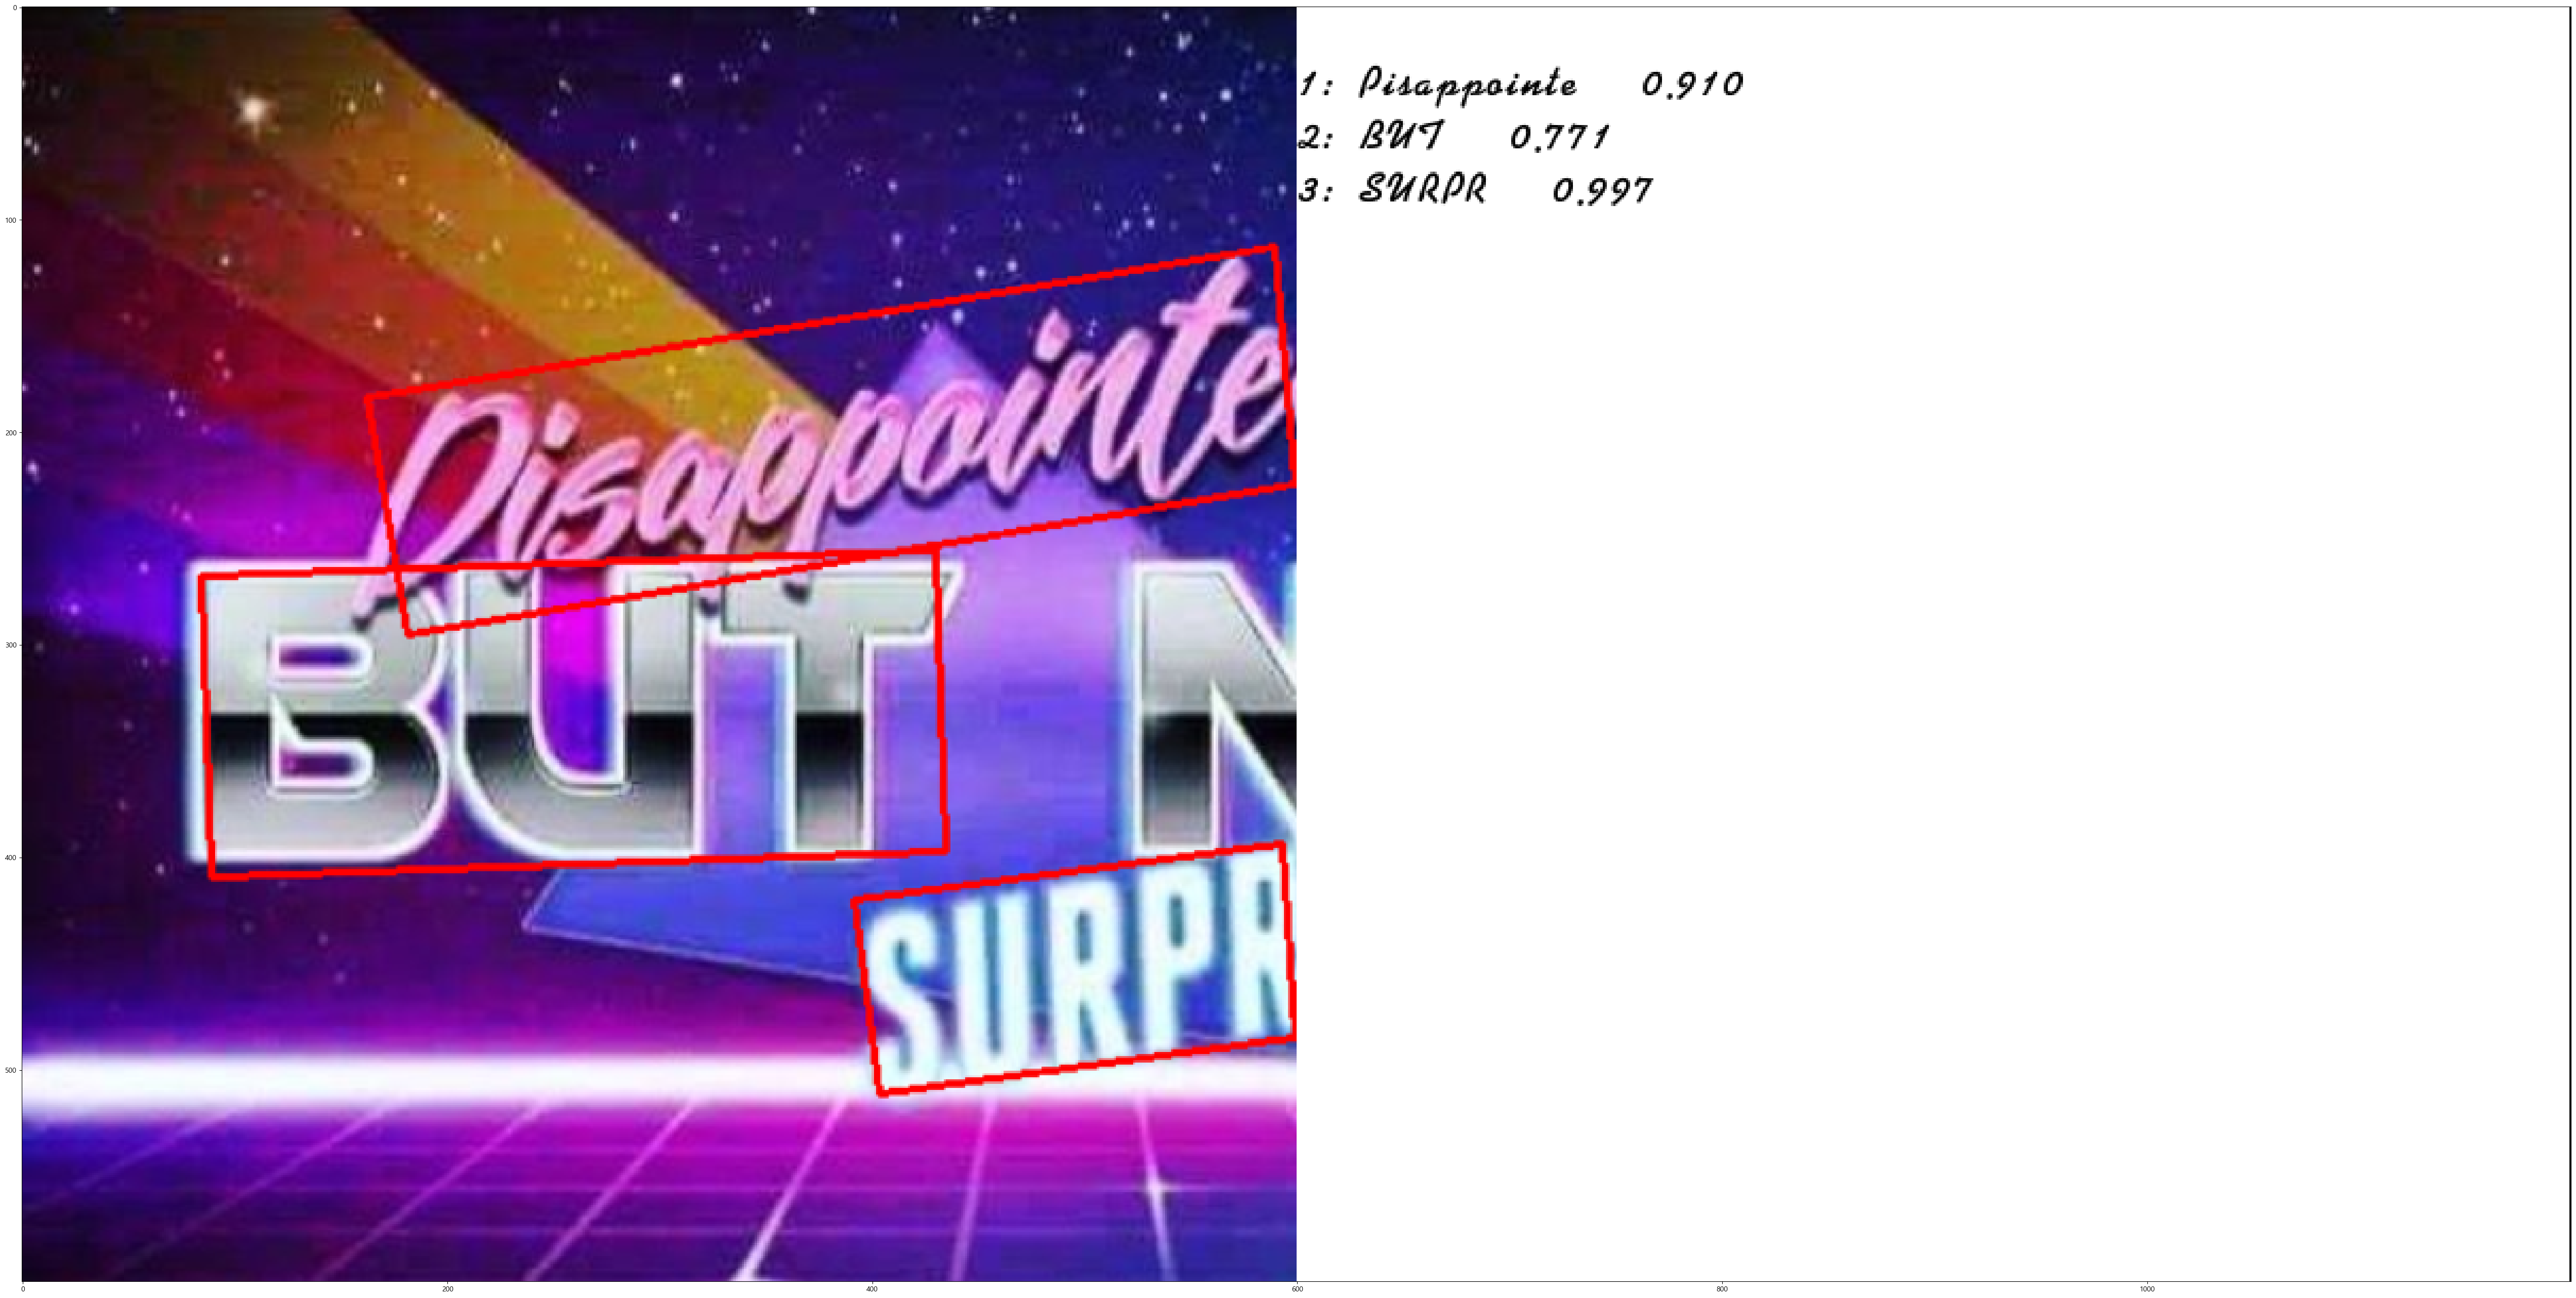

In [13]:
#for res in result:
print(boxes[0])
print(texts[0])
print(scores[0])#, Text: {res[1]}

# Specifying font path for draw_ocr method
font_path = 'C:/Users/UserK/ds_study/DL_proj/PaddleOCR-main/doc/fonts/korean.TTF'

# imports image
# 이부분에 크롭 이미지 변수, cropped_image를 활용
img = cropped_image

# reorders the color channelsa
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Visualize our image and detections
# resizing display area
plt.figure(figsize = (65, 65))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path = font_path) 

# show the image using matplotlib
plt.imshow(annotated)

In [ ]:
visualizeOCR(ocr_df.iloc[0])